In [3]:
pip install control

  Obtaining dependency information for control from https://files.pythonhosted.org/packages/b2/9b/972af6f963631c10e98e35fe53a46f6f4ec1e2dd05c5d88f63f3c75c3d21/control-0.10.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/549.6 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/549.6 kB 1.7 MB/s eta 0:00:01
   ---- ----------------------------------- 61.4/549.6 kB 1.7 MB/s eta 0:00:01
   ------------------ --------------------- 256.0/549.6 kB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 256.0/549.6 kB 2.0 MB/s eta 0:00:01
   ------------------------------ --------- 419.8/549.6 kB 1.9 MB/s eta 0:00:01
   -------------------------------------- - 522.2/549.6 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 549.6/549.6 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import control as ctrl

In [ ]:
G = ctrl.TransferFunction([1],[1])
H = ctrl.TransferFunction([1],[1])
I = ctrl.TransferFunction([1],[1])
J = ctrl.TransferFunction([1],[1])

GH_series  = ctrl.series(G,H)
HI_series = ctrl.series(H,I)
IG_series = ctrl.feedback(I,G)


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar diagrama
4. Simular resposta ao degrau
5. Sair
Escolha uma opção:



=== Criar Novo Bloco ===
Digite o nome do bloco (ex: G1):
Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):
Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):
Bloco G1 criado com sucesso!


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar diagrama
4. Simular resposta ao degrau
5. Sair
Escolha uma opção:

=== Criar Novo Bloco ===
Digite o nome do bloco (ex: G1):
Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):
Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):
Bloco G2 criado com sucesso!


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar diagrama
4. Simular resposta ao degrau
5. Sair
Escolha uma opção:

=== Conectar Blocos ===
Blocos disponíveis: ['G1', 'G2']
Escolha o primeiro bloco:
Escolha o segundo bloco:
Tipo de conexão (serie / paralelo / feedback):
Digite o nome do novo bloco resultante:
Novo bloco G12 criado com sucesso!


====== MENU ======
1. Criar novo 

In [ ]:
import control as ctrl
import matplotlib.pyplot as plt
import networkx as nx

# Blocos criados
blocos = {}

# Conexões feitas
conexoes = []

def criar_bloco():
    print("\n=== Criar Novo Bloco ===")
    print("Digite o nome do bloco (ex: G1):")
    nome = input()
    
    print("Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):")
    num = input().split()
    
    print("Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):")
    den = input().split()
    
    num = [float(i) for i in num]
    den = [float(i) for i in den]
    
    blocos[nome] = ctrl.TransferFunction(num, den)
    print(f"Bloco {nome} criado com sucesso!\n")

def conectar_blocos():
    print("\n=== Conectar Blocos ===")
    print(f"Blocos disponíveis: {list(blocos.keys())}")
    
    print("Escolha o primeiro bloco:")
    b1 = input()
    
    print("Escolha o segundo bloco:")
    b2 = input()
    
    print("Tipo de conexão (serie / paralelo / feedback):")
    tipo = input().lower()
    
    if tipo == "serie":
        novo = ctrl.series(blocos[b1], blocos[b2])
        conexoes.append((b1, b2, 'serie'))
    elif tipo == "paralelo":
        novo = ctrl.parallel(blocos[b1], blocos[b2])
        conexoes.append((b1, b2, 'paralelo'))
    elif tipo == "feedback":
        print("Realimentação positiva ou negativa? (pos / neg):")
        sinal = input().lower()
        sign = 1 if sinal == "pos" else -1
        novo = ctrl.feedback(blocos[b1], blocos[b2], sign=sign)
        conexoes.append((b1, b2, f'feedback {sinal}'))
    else:
        print("Tipo de conexão inválido!")
        return

    print("Digite o nome do novo bloco resultante:")
    nome_novo = input()
    
    blocos[nome_novo] = novo
    print(f"Novo bloco {nome_novo} criado com sucesso!\n")

def mostrar_blocos():
    print("\n=== Diagrama Atual (Texto) ===")
    for nome, bloco in blocos.items():
        print(f"{nome}: {bloco}")
    print("======================\n")


def plotar_resposta():
    print("\n=== Simular Resposta ao Degrau ===")
    print("Digite o nome do bloco final para simular a resposta:")
    nome = input()
    
    if nome in blocos:
        t, y = ctrl.step_response(blocos[nome])
        plt.plot(t, y)
        plt.title(f'Resposta ao Degrau - {nome}')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Saída')
        plt.grid()
        plt.show()
    else:
        print("Bloco não encontrado!")

def menu():
    while True:
        print("\n====== MENU ======")
        print("1. Criar novo bloco")
        print("2. Conectar blocos")
        print("3. Mostrar blocos (texto)")
        print("4. Simular resposta ao degrau")
        print("5. Sair")
        print("Escolha uma opção:")
        escolha = input()

        if escolha == "1":
            criar_bloco()
        elif escolha == "2":
            conectar_blocos()
        elif escolha == "3":
            mostrar_blocos()
        elif escolha == "4":
            plotar_resposta()
        elif escolha == "5":
            print("Saindo...")
            break
        else:
            print('Escolha uma opção válida')



====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Mostrar diagrama (gráfico)
5. Simular resposta ao degrau
6. Sair
Escolha uma opção:

=== Criar Novo Bloco ===
Digite o nome do bloco (ex: G1):
Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):
Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):
Bloco G1 criado com sucesso!


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Mostrar diagrama (gráfico)
5. Simular resposta ao degrau
6. Sair
Escolha uma opção:

=== Criar Novo Bloco ===
Digite o nome do bloco (ex: G1):
Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):
Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):
Bloco G2 criado com sucesso!


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Mostrar diagrama (gráfico)
5. Simular resposta ao degrau
6. Sair
Escolha uma opção:

====== MENU ======
1.

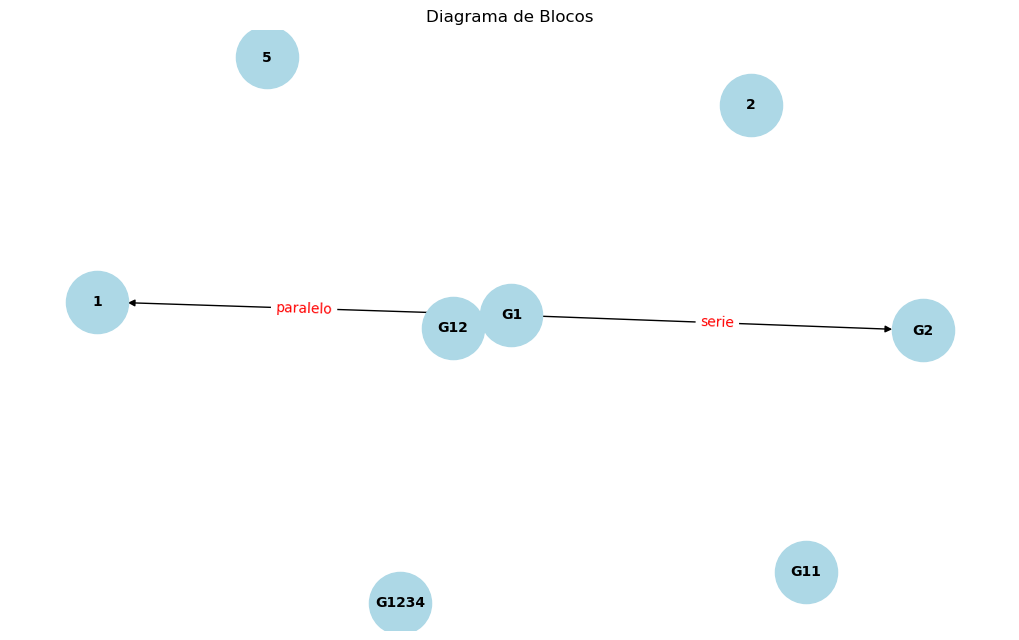


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Mostrar diagrama (gráfico)
5. Simular resposta ao degrau
6. Sair
Escolha uma opção:


In [ ]:
menu()